In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from PIL import Image
from numpy import array
from keras.utils import to_categorical

In [40]:
# Model configuration
img_width, img_height = 16, 16
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.35
# noise_factor = 0.55
# noise_factor = 0.75
number_of_visualizations = 6

local_zip = '/content/USPS_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/trainntest')

train_dir = '/content/trainntest/train'
validation_dir = '/content/trainntest/test'
y_train = []
y_test = []
x_train = []
x_test = []
for path in os.listdir(train_dir):
    if os.path.isfile(os.path.join(train_dir, path)):
        y_train.append(int(path[0]))

for path in os.listdir(validation_dir):
  if os.path.isfile(os.path.join(validation_dir, path)):
      y_test.append(int(path[0]))


for path in os.listdir(train_dir):
  if os.path.isfile(os.path.join(train_dir,path)):
    x_train.append(cv2.cvtColor(cv2.imread(f"{train_dir}/{path}"), cv2.COLOR_RGB2GRAY))

for path in os.listdir(validation_dir):
  if os.path.isfile(os.path.join(validation_dir,path)):
    x_test.append(cv2.cvtColor(cv2.imread(f"{validation_dir}/{path}"), cv2.COLOR_RGB2GRAY))



input_train = np.array(x_train)
input_test = np.array(x_test)

num_classes = 10

target_train = to_categorical(y_train, num_classes)
target_test = to_categorical(y_test, num_classes)


(input_train1, target_train1), (input_test1, target_test1) = mnist.load_data()
print(input_train.shape)
print(input_train.size)
print(input_test.size)
print(input_test.shape)

(7291, 16, 16)
1866496
513792
(2007, 16, 16)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 32)        18464     
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 32)       9248      
 ranspose)                                                       
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 64)       18496     
 ranspose)                                                       
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 1)         577       
                                                                 
Total params: 47,425
Trainable params: 47,425
Non-trai

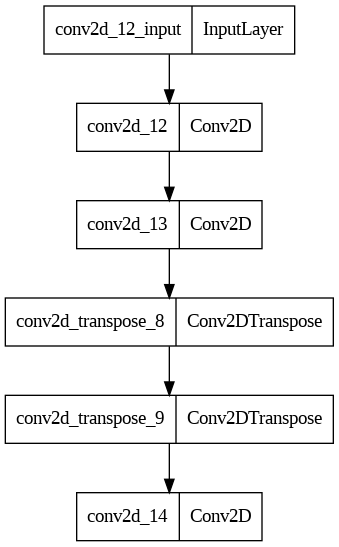

In [41]:

# Reshape data based on channels first / channels last strategy.

if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Add noise
pure = input_train
pure_test = input_test
noise = np.random.normal(0, 1, pure.shape)
noise_test = np.random.normal(0, 1, pure_test.shape)
noisy_input = pure + noise_factor * noise
noisy_input_test = pure_test + noise_factor * noise_test

# Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(64, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(1, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png')

# Compile and fit data


Epoch 1/50
39/39 [==============================] - 3s 22ms/step - loss: 0.3882 - val_loss: 0.3140
Epoch 2/50
39/39 [==============================] - 0s 8ms/step - loss: 0.3014 - val_loss: 0.2933
Epoch 3/50
39/39 [==============================] - 0s 8ms/step - loss: 0.2892 - val_loss: 0.2861
Epoch 4/50
39/39 [==============================] - 0s 8ms/step - loss: 0.2834 - val_loss: 0.2822
Epoch 5/50
39/39 [==============================] - 0s 8ms/step - loss: 0.2802 - val_loss: 0.2812
Epoch 6/50
39/39 [==============================] - 0s 7ms/step - loss: 0.2775 - val_loss: 0.2780
Epoch 7/50
39/39 [==============================] - 0s 7ms/step - loss: 0.2748 - val_loss: 0.2758
Epoch 8/50
39/39 [==============================] - 0s 7ms/step - loss: 0.2736 - val_loss: 0.2743
Epoch 9/50
39/39 [==============================] - 0s 8ms/step - loss: 0.2719 - val_loss: 0.2731
Epoch 10/50
39/39 [==============================] - 0s 8ms/step - loss: 0.2712 - val_loss: 0.2741
Epoch 11/50
39/39 

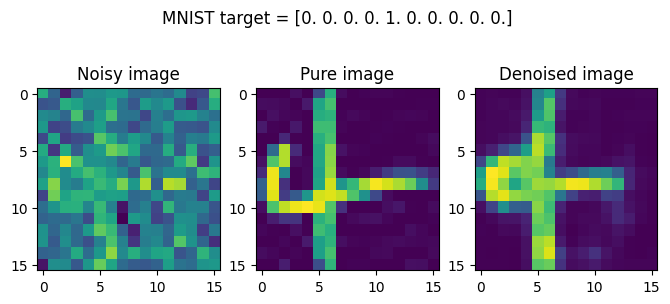

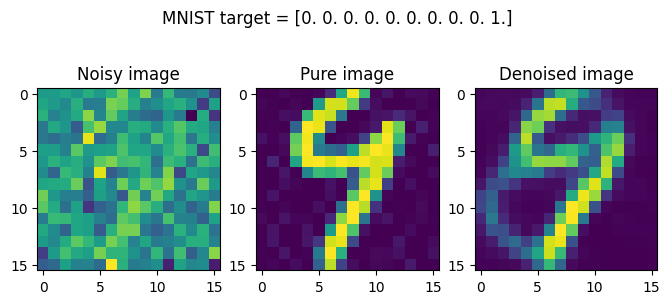

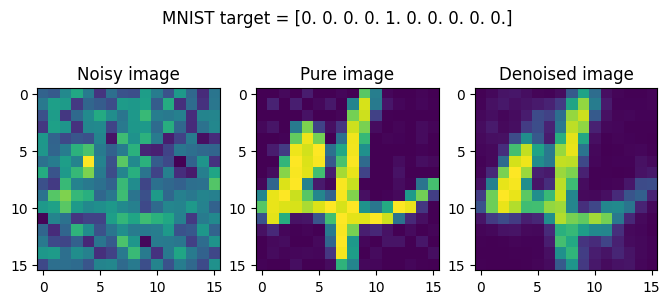

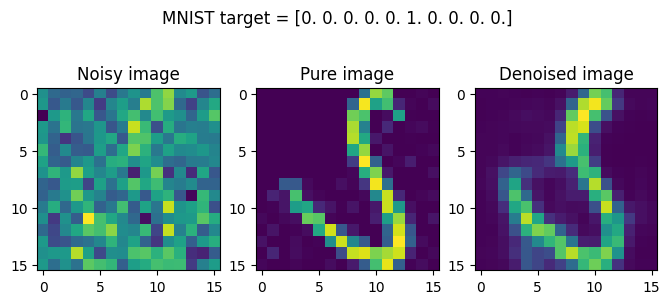

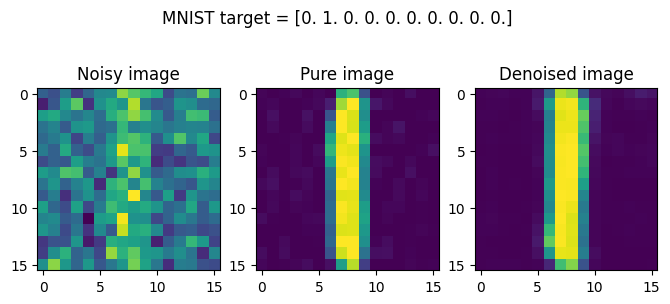

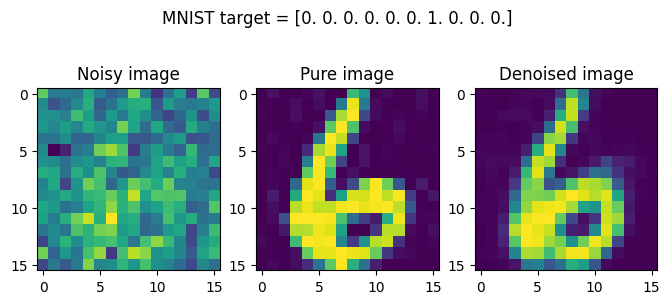

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

# Generate denoised images
samples = noisy_input_test[:number_of_visualizations]
targets = target_test[:number_of_visualizations]
denoised_images = model.predict(samples)

# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = noisy_input_test[i][:, :, 0]
  pure_image  = pure_test[i][:, :, 0]
  denoised_image = denoised_images[i][:, :, 0]
  input_class = np.argmax(targets[i])
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image)
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')
  fig.suptitle(f'target = {input_class}')
  plt.show()